In [9]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [10]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9722168737391601219, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 10617460760064947524
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8338740383729981443
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11281553818
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17797682997779920081
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import seaborn as sns
import time

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, auc, f1_score
from sklearn.metrics import classification_report, scorer, precision_score, recall_score

In [0]:
%matplotlib inline

In [0]:
pd.set_option('display.width', 4000)
pd.set_option('max_colwidth', 4000)
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)

student-mat.csv  telco-churn.csv  Test_Trial.ipynb  Untitled0.ipynb


In [0]:
dataset = pd.read_csv("/content/drive/My Drive/Google Collab/student-mat.csv", delimiter = ';')

In [16]:
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [0]:
binary_variables = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

In [0]:
numeric_variables = ['Medu', 'Fedu', 'age', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc', 'Walc', 'goout', 'health', 'absences']

In [0]:
categorical_variables = ['Fjob', 'Mjob', 'reason', 'guardian']

In [0]:
sample_dataset = dataset.copy()
sample_dataset1 = dataset.copy()

In [0]:
not_interested = ['G1', 'G2', 'G3']

In [0]:
interested = [col for col in dataset.columns if col not in not_interested]

In [0]:
new_dataset = dataset[interested]

In [0]:
y_values = dataset['G3']

In [0]:
from collections import defaultdict
d1 = defaultdict(LabelEncoder)
d2 = defaultdict(LabelEncoder)

In [0]:
bin_values = new_dataset[binary_variables]

In [0]:
cat_values = new_dataset[categorical_variables]

In [0]:
new_cat_values = pd.get_dummies(cat_values)

In [0]:
num_values = new_dataset[numeric_variables]

In [0]:
bin_fit = bin_values.apply(lambda x: d1[x.name].fit_transform(x))

In [0]:
final_dataset = pd.concat([num_values, bin_fit, new_cat_values], axis = 1)

In [0]:
y_labels = []

for i in y_values:
    if i >= y_values.median():
        y_labels.append(1)
    else:
        y_labels.append(0)

In [33]:
x = final_dataset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
ready_data = pd.DataFrame(x_scaled,columns=final_dataset.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
x_train, x_test, y_train, y_test = train_test_split(ready_data, y_labels, test_size = 0.33, random_state = 777)

In [0]:
#Model Creation
model = Sequential()
model.add(Dense(43, input_dim=43, kernel_initializer='normal', activation='relu'))
model.add(Dense(22, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

In [0]:
#Model Compilation
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
model.fit(x_train, y_train, epochs=150, batch_size=5, verbose=0)

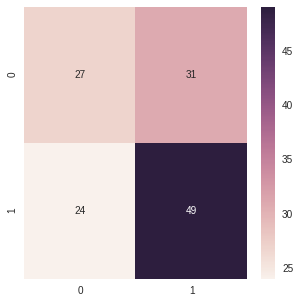

In [38]:
predictions = model.predict(x_test)

threshold = 0.5
predictions = (predictions > threshold)

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize = (5,5))

sns.heatmap(cm, annot=True, fmt="d")

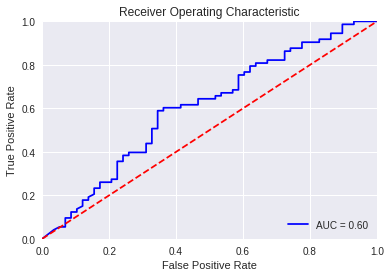

In [39]:
y_pred_keras = model.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_keras, tpr_keras, 'b', label = 'AUC = %0.2f' % auc_keras)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [40]:
score = round(accuracy_score(y_test, predictions),2)
print('Accuracy of Base Model: {} '.format(score))

scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Accuracy of Base Model: 0.58 
131/131 [==============================] - 0s 368us/step

acc: 58.02%


In [0]:
#Model Creation
model2 = Sequential()
model2.add(Dense(43, input_dim=43, kernel_initializer='normal', activation='sigmoid'))
model2.add(Dense(22, kernel_initializer='normal', activation='sigmoid'))
model2.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

#Model Compilation
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
model2.fit(x_train, y_train, epochs=150, batch_size=5, verbose=0)

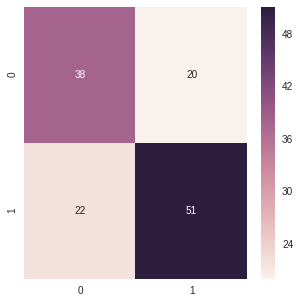

In [43]:
predictions2 = model2.predict(x_test)

threshold = 0.5
predictions2 = (predictions2 > threshold)

cm2 = confusion_matrix(y_test, predictions2)
plt.figure(figsize = (5,5))

sns.heatmap(cm2, annot=True, fmt="d")

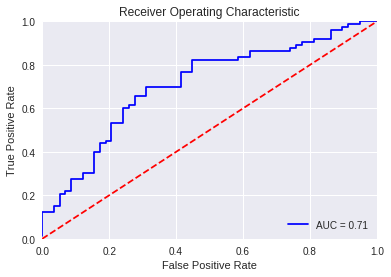

In [44]:
y_pred_keras = model2.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_keras, tpr_keras, 'b', label = 'AUC = %0.2f' % auc_keras)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [45]:
score = round(accuracy_score(y_test, predictions2),2)
print('Accuracy of Base Model: {} '.format(score))

scores = model2.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))

Accuracy of Base Model: 0.68 
131/131 [==============================] - 0s 553us/step

acc: 67.94%


In [0]:
#Model Creation
model3 = Sequential()
model3.add(Dense(43, input_dim=43, kernel_initializer='normal', activation='tanh'))
model3.add(Dense(22, kernel_initializer='normal', activation='tanh'))
model3.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

#Model Compilation
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
model3.fit(x_train, y_train, epochs=150, batch_size=5, verbose=0)

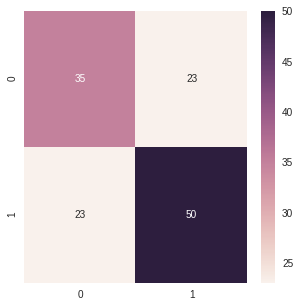

In [48]:
predictions3 = model3.predict(x_test)

threshold = 0.5
predictions3 = (predictions3 > threshold)

cm3 = confusion_matrix(y_test, predictions3)
plt.figure(figsize = (5,5))

sns.heatmap(cm3, annot=True, fmt="d")

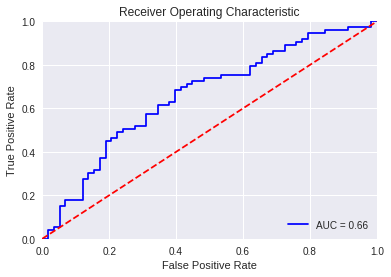

In [49]:
y_pred_keras = model3.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_keras, tpr_keras, 'b', label = 'AUC = %0.2f' % auc_keras)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
score = round(accuracy_score(y_test, predictions3),2)
print('Accuracy of Base Model: {} '.format(score))

scores = model3.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model3.metrics_names[1], scores[1]*100))

Accuracy of Base Model: 0.65 
131/131 [==============================] - 0s 1ms/step

acc: 64.89%


In [0]:
scores = []
times = []
nodes = np.arange(1,43)
    
for x in nodes:
  
    #Model Creation
    model = Sequential()
    model.add(Dense(43, input_dim=43, kernel_initializer='normal', activation='relu'))
    model.add(Dense(x, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    
    #Model Compilation
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  
    
    model.fit(x_train, y_train, epochs=150, batch_size=10, verbose=0)
    times.append(x)
    score = model.evaluate(x_test, y_test, verbose=0)[1]
    scores.append(score)

In [0]:
scores2 = []
times2 = []
nodes = np.arange(1,43)
    
for x in nodes:
  
    #Model Creation
    model2 = Sequential()
    model2.add(Dense(43, input_dim=43, kernel_initializer='normal', activation='sigmoid'))
    model2.add(Dense(x, kernel_initializer='normal', activation='sigmoid'))
    model2.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

    #Model Compilation
    model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model2.fit(x_train, y_train, epochs=150, batch_size=10, verbose=0)
    times2.append(x)
    score = model2.evaluate(x_test, y_test, verbose=0)[1]
    scores2.append(score)

In [0]:
scores3 = []
times3 = []
nodes = np.arange(1,43)
    
for x in nodes:
  
    #Model Creation
    model3 = Sequential()
    model3.add(Dense(43, input_dim=43, kernel_initializer='normal', activation='tanh'))
    model3.add(Dense(x, kernel_initializer='normal', activation='tanh'))
    model3.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

    #Model Compilation
    model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model3.fit(x_train, y_train, epochs=150, batch_size=10, verbose=0)
    times3.append(x)
    score = model3.evaluate(x_test, y_test, verbose=0)[1]
    scores3.append(score)

In [0]:
final_results = pd.DataFrame()
final_results['Nodes'] = times
final_results['model1_score'] = scores
final_results['model2_score'] = scores2
final_results['model3_score'] = scores3

In [55]:
print('The # of nodes that gave the best accuracy for ReLu Model is {}'.format(int(final_results.loc[final_results['model1_score'].idxmax()][0])))
print('The # of nodes that gave the best accuracy for Sigmoid Model is {}'.format(int(final_results.loc[final_results['model2_score'].idxmax()][0])))
print('The # of nodes that gave the best accuracy for Tanh Model is {}'.format(int(final_results.loc[final_results['model3_score'].idxmax()][0])))

The # of nodes that gave the best accuracy for ReLu Model is 12
The # of nodes that gave the best accuracy for Sigmoid Model is 11
The # of nodes that gave the best accuracy for Tanh Model is 3


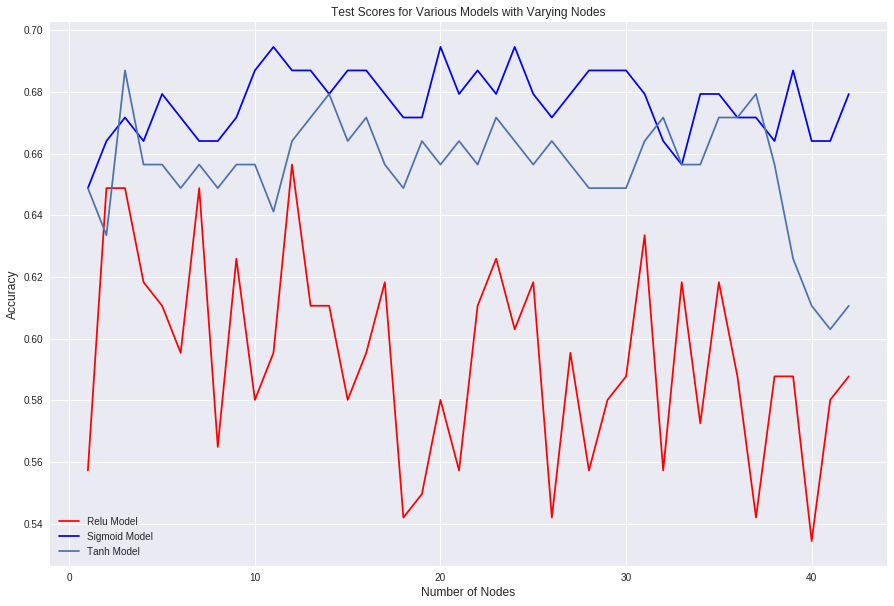

In [56]:
plt.figure(figsize=(15,10))

plt.plot(times, scores, 'r-', label='Relu Model')
plt.plot(times, scores2, 'b-', label='Sigmoid Model')
plt.plot(times, scores3, '-', label='Tanh Model')

plt.legend(loc='best')
plt.title('Test Scores for Various Models with Varying Nodes')
plt.xlabel('Number of Nodes', size = 12)
plt.ylabel('Accuracy', size = 12)
plt.show()

In [0]:
# Function to create model, required for KerasClassifier
def create_model():
	#Model Creation
  model = Sequential()
  model.add(Dense(43, input_dim=43, kernel_initializer='normal', activation='relu'))
  model.add(Dense(22, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
	# Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])	
  return model

In [0]:
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
epochs = [10, 20, 30, 40, 50, 60,70, 80, 90, 100]

param_grid = dict(batch_size=batch_size, epochs=epochs)

In [0]:
from sklearn.model_selection import RandomizedSearchCV

In [60]:
n_iter_search = 20
random_search = RandomizedSearchCV(model, param_distributions=param_grid,
                                   n_iter=n_iter_search, cv=5)

random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f74b750d8d0>,
          fit_params=None, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'batch_size': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'epochs': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [0]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [62]:
report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.667 (std: 0.076)
Parameters: {'epochs': 50, 'batch_size': 60}

Model with rank: 2
Mean validation score: 0.667 (std: 0.071)
Parameters: {'epochs': 40, 'batch_size': 20}

Model with rank: 3
Mean validation score: 0.663 (std: 0.060)
Parameters: {'epochs': 90, 'batch_size': 80}



In [0]:
# Function to create model, required for KerasClassifier
def create_model():
	#Model Creation
  model = Sequential()
  model.add(Dense(43, input_dim=43, kernel_initializer='normal', activation='sigmoid'))
  model.add(Dense(22, kernel_initializer='normal', activation='sigmoid'))
  model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
	# Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])	
  return model

In [0]:
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
epochs = [10, 20, 30, 40, 50, 60,70, 80, 90, 100]

param_grid = dict(batch_size=batch_size, epochs=epochs)

In [65]:
n_iter_search = 20
random_search = RandomizedSearchCV(model, param_distributions=param_grid,
                                   n_iter=n_iter_search, cv=5)

random_search.fit(x_train, y_train)
report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.648 (std: 0.033)
Parameters: {'epochs': 90, 'batch_size': 10}

Model with rank: 2
Mean validation score: 0.640 (std: 0.057)
Parameters: {'epochs': 100, 'batch_size': 20}

Model with rank: 3
Mean validation score: 0.633 (std: 0.058)
Parameters: {'epochs': 80, 'batch_size': 20}



In [0]:
# Function to create model, required for KerasClassifier
def create_model():
	#Model Creation
  model = Sequential()
  model.add(Dense(43, input_dim=43, kernel_initializer='normal', activation='tanh'))
  model.add(Dense(22, kernel_initializer='normal', activation='tanh'))
  model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
	# Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])	
  return model

In [0]:
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
epochs = [10, 20, 30, 40, 50, 60,70, 80, 90, 100]

param_grid = dict(batch_size=batch_size, epochs=epochs)

In [68]:
n_iter_search = 20
random_search = RandomizedSearchCV(model, param_distributions=param_grid,
                                   n_iter=n_iter_search, cv=5)

random_search.fit(x_train, y_train)
report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.686 (std: 0.043)
Parameters: {'epochs': 90, 'batch_size': 20}

Model with rank: 2
Mean validation score: 0.678 (std: 0.043)
Parameters: {'epochs': 80, 'batch_size': 20}

Model with rank: 3
Mean validation score: 0.670 (std: 0.055)
Parameters: {'epochs': 70, 'batch_size': 80}

